In [1]:
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
import pandas as pd
from nltk.tokenize import TweetTokenizer, WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

# Magic to tell python notebook we want matplotlib charts included
%matplotlib inline

In [2]:
df = pd.read_json("training_set.json")

In [3]:
conditions = [
    (df['sentiment'] == 0) , 
    (df['sentiment'] <  0) ,
    (df['sentiment'] >  0)]
choices = ['neutral', 'bullish', 'bearish']
df['classes'] = np.select(conditions, choices, default='neutral')
print(df)

      sentiment                                            snippet  target  \
0        -0.463                                          downgrade   $PCAR   
1         0.678       [looking sexy this morning, break on volume]   $AMZN   
2         0.377                               still long term fan!   $SBUX   
3         0.129  $TFM will have a way to go price wise to compe...     $KR   
4         0.395      iPhone SE Could Be Doing Better Than Expected   $AAPL   
5         0.458      Now up to 200 stocks making new 52 week highs    $TJX   
6         0.288  There's no reason why $GOOGL can't get back to...  $GOOGL   
7        -0.453                                              short   $CVEO   
8         0.372               Pivotal sees 27% upside for Alphabet   $YHOO   
9         0.216                                  the most trending   $DWTI   
10        0.241  $GOOGL patents turn signal detector for autono...  $GOOGL   
11        0.557            Investor long-term stock recommendati

In [4]:
from wordcloud import WordCloud,STOPWORDS

train_pos = df[ df['classes'] == 'bullish']
train_pos = df['tweet']
train_neg = df[ df['classes'] == 'bearish']
train_neg = df['tweet']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word.upper() != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    


# Before Preprocessing

Bullish words


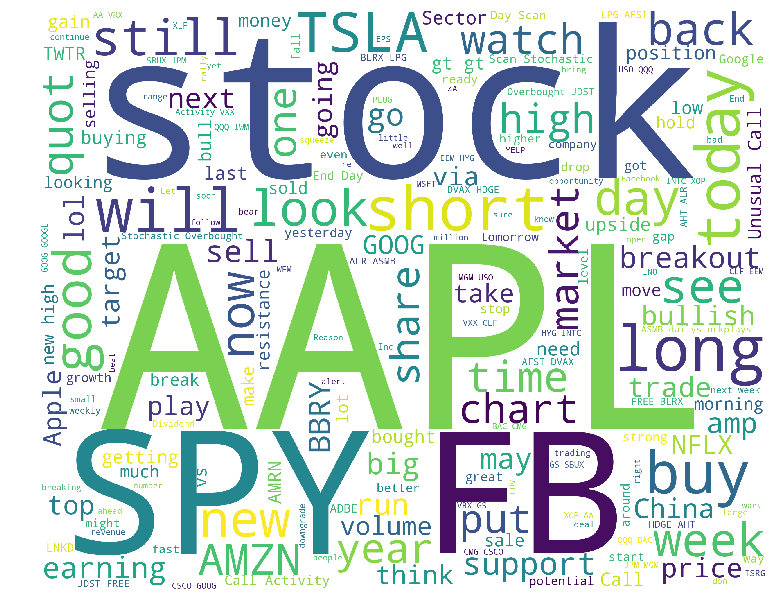

Bearish words


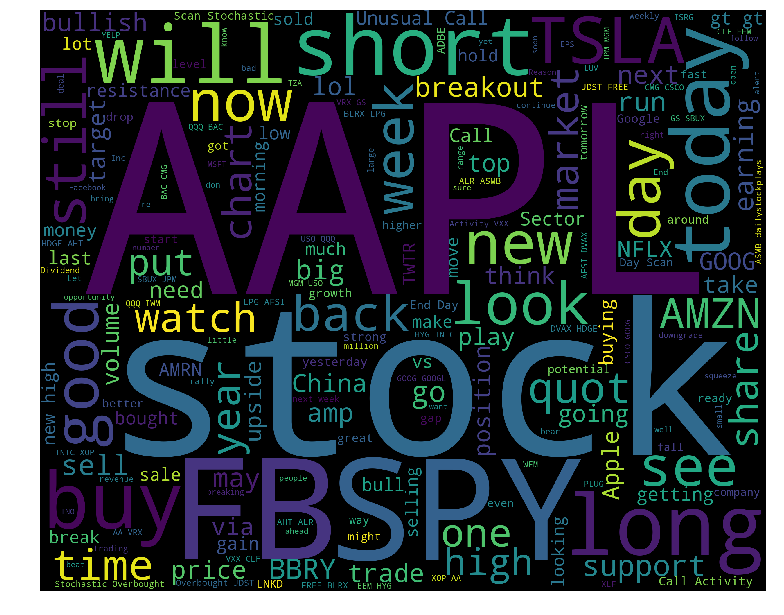

In [5]:
print("Bullish words")
wordcloud_draw(train_pos,'white')
print("Bearish words")
wordcloud_draw(train_neg)

# Preprocessing of Tweets

In [6]:
#placeholders 
rep = 0  #index for placeholders
p_mentions = [" @mentions ", " "]
p_cashtag = [" @cashtag ", " "]
p_url = [" @url ", " "]
stopwords = set(stopwords.words("english"))
qmark = " qmark "  
emark = " emark "

w_tokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

df['tweet'] = df['tweet'].str.lower()
df['tweet'] = df['tweet'].str.replace('([@][\w_-]+)', p_mentions[rep], case=False)
df['tweet'] = df['tweet'].str.replace('([$][a-z]+)', p_cashtag[rep], case=False)
df['tweet'] = df['tweet'].str.replace('http\S+|www.\S+', p_url[rep], case=False)
df['tweet'] = df['tweet'].str.replace('&amp', " & ", case=False)
df['tweet'] = df['tweet'].str.replace('&#39;', "'", case=False)
df['tweet'] = df['tweet'].str.replace('&gt;', " ", case=False)
df['tweet'] = df['tweet'].str.replace('&lt;', " ", case=False)
df['tweet'] = df['tweet'].str.replace('\?', qmark, case=False)
df['tweet'] = df['tweet'].str.replace('!', emark, case=False)
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df['tweet'] = df['tweet'].apply(lemmatize_text)

In [7]:
df.head

<bound method NDFrame.head of       sentiment                                            snippet  target  \
0        -0.463                                          downgrade   $PCAR   
1         0.678       [looking sexy this morning, break on volume]   $AMZN   
2         0.377                               still long term fan!   $SBUX   
3         0.129  $TFM will have a way to go price wise to compe...     $KR   
4         0.395      iPhone SE Could Be Doing Better Than Expected   $AAPL   
5         0.458      Now up to 200 stocks making new 52 week highs    $TJX   
6         0.288  There's no reason why $GOOGL can't get back to...  $GOOGL   
7        -0.453                                              short   $CVEO   
8         0.372               Pivotal sees 27% upside for Alphabet   $YHOO   
9         0.216                                  the most trending   $DWTI   
10        0.241  $GOOGL patents turn signal detector for autono...  $GOOGL   
11        0.557            Investo

# Word Cloud After Preprocessing 

Bullish words


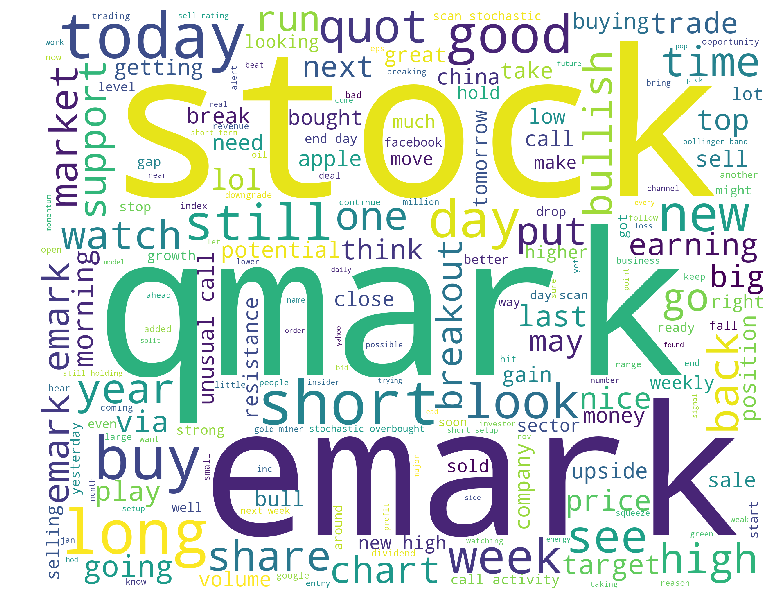

Bearish words


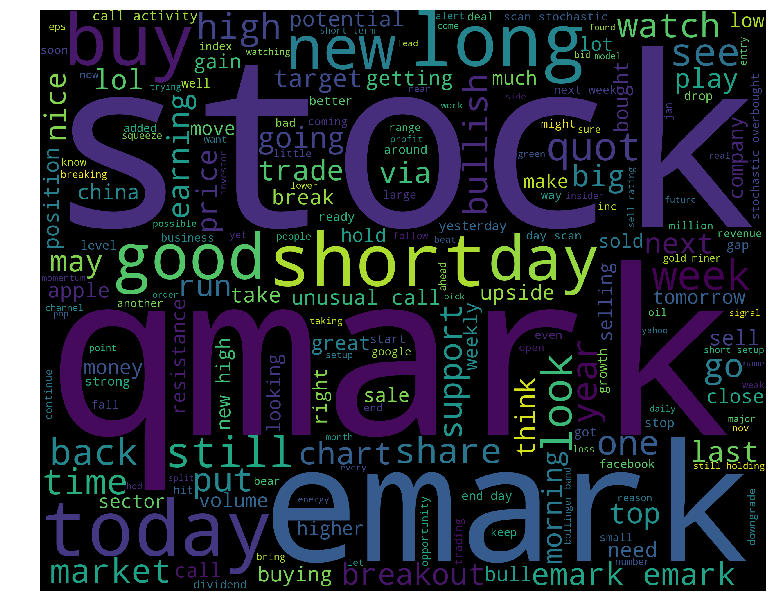

In [8]:
new_train_pos = df[ df['classes'] == 'bullish']
new_train_pos = df['tweet']
new_train_neg = df[ df['classes'] == 'bearish']
new_train_neg = df['tweet']


print("Bullish words")
wordcloud_draw(new_train_pos,'white')
print("Bearish words")
wordcloud_draw(new_train_neg)